<a href="https://colab.research.google.com/github/emrllh/My_works/blob/main/Activation_functions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf

**Activation functions** are functions used in neural networks to compute the weighted sum of input and biases, which is used to decide if a neuron can be fired or not. It manipulates the presented data through some gradient processing usually gradient descent and afterward produces an output for the neural network, that contains the parameters in the data.

https://www.theaidream.com/post/an-overview-of-activation-functions-in-deep-learning

### Xavier/Glorot Initialization
Why shouldn’t you initialize the weights with zeroes or randomly (without knowing the distribution):


- If the weights in a network start too small, then the signal shrinks as it passes through each layer until it’s too tiny to be useful.
- If the weights in a network start too large, then the signal grows as it passes through each layer until it’s too massive to be useful.

Xavier Initialization initializes the weights in your network by drawing them from a distribution with zero mean and a specific variance,

var(Wi)= 1/fan_in

fan_in is the number of incoming neurons.

Generally used with tanh activation.

var(Wi) = 1/fan_in + fan_out

fan_out is number of out neurons

### He Normal Initialization

is similar to Xavier initialization, with the factor multiplied by two. In this method, the weights are initialized keeping in mind the size of the previous layer which helps in attaining a global minimum of the cost function faster and more efficiently.The weights are still random but differ in range depending on the size of the previous layer of neurons. This provides a controlled initialization hence the faster and more efficient gradient descent.

Var(wi) =2/ fan_in

`` def __init__(scale=1.0, mode='fan_in', distribution='truncated_normal', seed=None) ``

Initializer that adapts its scale to the shape of its input tensors.

Also available via the shortcut function tf.keras.initializers.variance_scaling.

With distribution="truncated_normal" or "untruncated_normal", samples are drawn from a truncated/untruncated normal distribution with a mean of zero and a standard deviation (after truncation, if used) `` stddev = sqrt`(scale / n) ``, where n is:

number of input units in the weight tensor, if mode="fan_in"
number of output units, if mode="fan_out"
average of the numbers of input and output units, if mode="fan_avg"
With distribution="uniform", samples are drawn from a uniform distribution within `[-limit, limit]`, where `limit = sqrt(3 * scale / n)`.

Examples:

 #### Standalone usage:
`` initializer = tf.keras.initializers.VarianceScaling(
 scale=0.1, mode='fan_in', distribution='uniform')
values = initializer(shape=(2, 2)) ``
#### Usage in a Keras layer:
`` initializer = tf.keras.initializers.VarianceScaling(
 scale=0.1, mode='fan_in', distribution='uniform')
layer = tf.keras.layers.Dense(3, kernel_initializer=initializer) ``


In [ ]:
dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [ ]:
he_avg_init= tf.keras.initializers.VarianceScaling(scale=2, mode='fan_avg',
                                                   distribution='uniform')

dense=tf.keras.layers.Dense(50, activation='sigmoid',
                            kernel_initializer=he_avg_init)

### Batch Normalization

Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

if we are able to somehow normalize the activations from each previous layer then the gradient descent will converge better during training. This is precisely what the Batch Norm layer does for us.

Just like the parameters (eg. weights, bias) of any network layer, a Batch Norm layer also has parameters of its own:

Two learnable parameters called beta and gamma.
Two non-learnable parameters (Mean Moving Average and Variance Moving Average) are saved as part of the ‘state’ of the Batch Norm layer.

Just like the parameters (eg. weights, bias) of any network layer, a Batch Norm layer also has parameters of its own:

- Two learnable parameters called beta and gamma.
- Two non-learnable parameters (Mean Moving Average and Variance Moving Average) are saved as part of the ‘state’ of the Batch Norm layer.

https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739




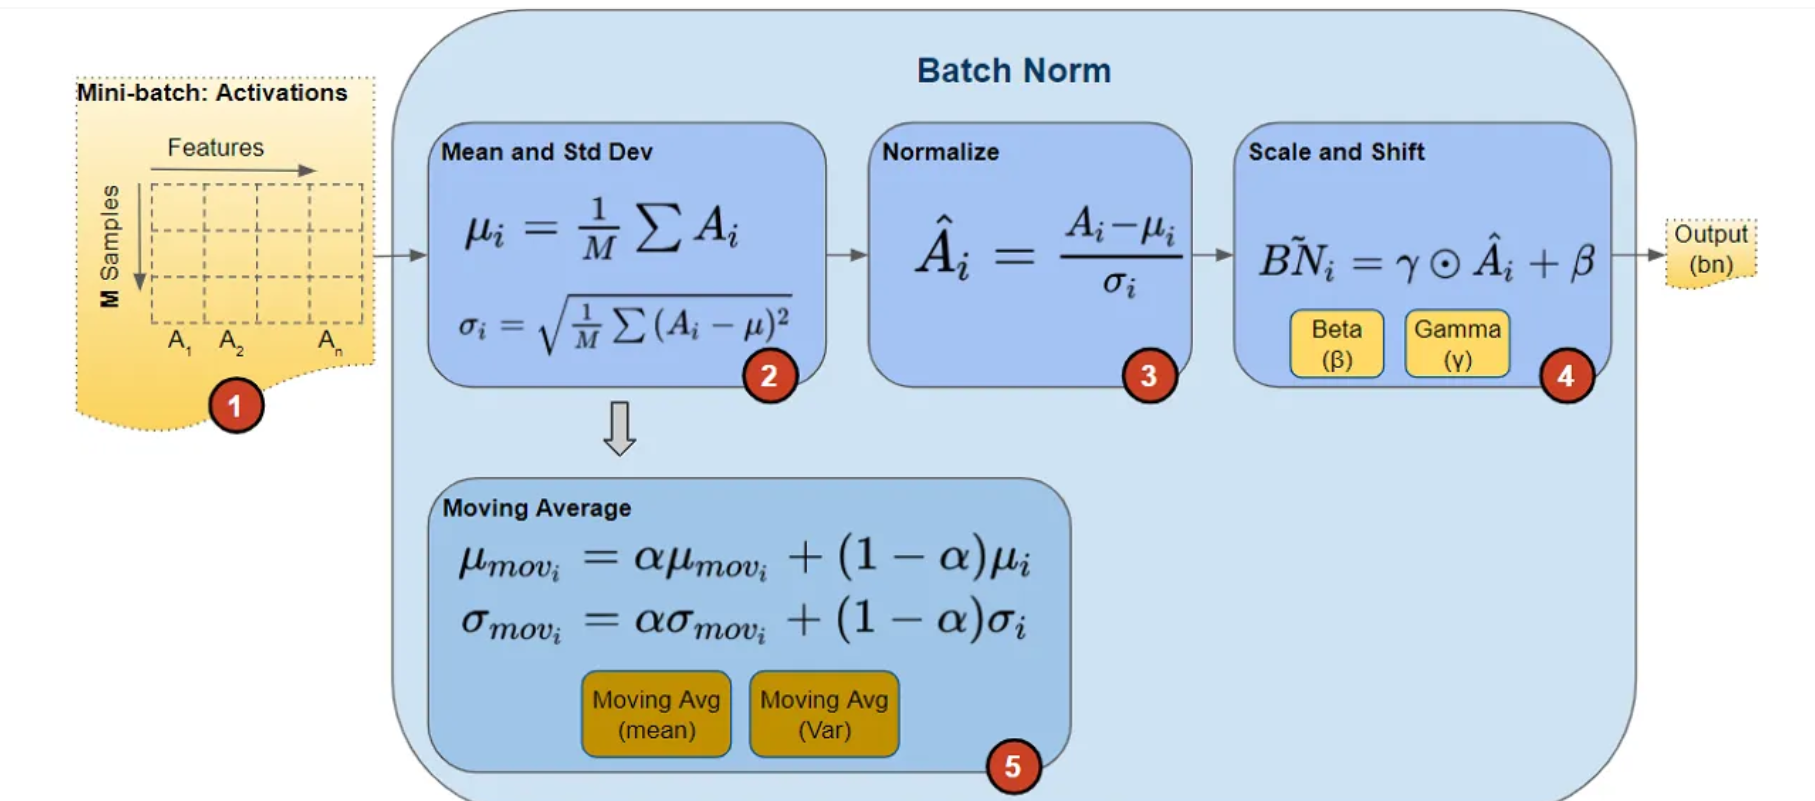

In [ ]:
from IPython.display import Image
Image('batch norm.png')

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train,X_valid=X_train_full[:50000],X_train_full[50000:]
y_train,y_valid=y_train_full[:50000],y_train_full[50000:]
X_test=X_test

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_3 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_4 (Bat  (None, 100)               4

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_2/gamma:0', True),
 ('batch_normalization_2/beta:0', True),
 ('batch_normalization_2/moving_mean:0', False),
 ('batch_normalization_2/moving_variance:0', False)]

In [ ]:
[(var.name, var.trainable) for var in model.layers[2].variables]

[('dense_1/kernel:0', True), ('dense_1/bias:0', True)]

In [ ]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,)

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
                       metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=5,
                  validation_data=(X_valid,y_valid))

Epoch 1/5
1563/1563 [==============================] - 15s 8ms/step - loss: 0.5687 - accuracy: 0.8043 - val_loss: 0.4120 - val_accuracy: 0.8531
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4146 - accuracy: 0.8536 - val_loss: 0.3738 - val_accuracy: 0.8652
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3732 - accuracy: 0.8674 - val_loss: 0.3593 - val_accuracy: 0.8693
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3462 - accuracy: 0.8761 - val_loss: 0.3449 - val_accuracy: 0.8744
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3275 - accuracy: 0.8815 - val_loss: 0.3373 - val_accuracy: 0.8750


The layer before a `BatchNormalization` layer does not need to have bias terms, since the `BatchNormalization` layer some as well, it would be a waste of parameters, so you can set `use_bias=False` when creating those layers:

### Gradient Clipping

Gradient clipping is a technique used to prevent the so-called “exploding gradients” problem in neural networks, which can occur when large error gradients accumulate and result in very large updates to neural network model weights during training.


Gradient clipping comes in two main types:(All `tf.keras.optimizers` accept `clipnorm` or `clipvalue` arguments:)


- Value Clipping: This involves clipping the gradients when their absolute value exceeds a predefined threshold. The result is that the gradient vector’s direction may be changed.

- Norm Clipping: This involves scaling the whole gradient if the L2 norm of the gradient vector exceeds a certain threshold. This method preserves the direction of the gradient and is generally the preferred method for gradient clipping.

Please note that while gradient clipping is an important technique to control the `exploding` gradient problem, it does not help with the `vanishing` gradient problem, which is a separate issue commonly faced in deep learning models.

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])